# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
#pip install citipy <-install to use citipy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/557.7 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=4f7fd4c377bffdc9a172b21a4c71c5fcf2f5134cde77237c3badecda7fc2a842
  Stored in directory: /Users/vickylynnmauldin/Library/Caches/pip/wheels/72/ae/63/5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
# code was coming up empty bc date was not tracked correctly




# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + "Kentucky"
#print(url)

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #https://www.geeksforgeeks.org/python-string-replace/
    city_url =  url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
      # Convert the date to ISO standard.
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.fromtimestamp.html
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')  
                


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | aberfoyle
Processing Record 4 of Set 1 | karamay
City not found. Skipping...
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | dumai
Processing Record 7 of Set 1 | quang ngai
Processing Record 8 of Set 1 | gushikawa
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | rawson
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | mohgaon
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | tilichiki
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of 

Processing Record 37 of Set 4 | champasak
Processing Record 38 of Set 4 | college
Processing Record 39 of Set 4 | kachug
Processing Record 40 of Set 4 | blythe
Processing Record 41 of Set 4 | mikhaylovka
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | zunheboto
Processing Record 44 of Set 4 | ngunguru
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | tazovskiy
Processing Record 47 of Set 4 | kharopon
Processing Record 48 of Set 4 | peleduy
Processing Record 49 of Set 4 | kahului
Processing Record 0 of Set 5 | pokosnoye
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | mrirt
City not found. Skipping...
Processing Record 3 of Set 5 | chabahar
Processing Record 4 of Set 5 | aswan
Processing Record 5 of Set 5 | ixtapa
Processing Record 6 of Set 5 | dondo
Processing Record 7 of Set 5 | rio branco
Processing Record 8 of Set 5 | yerofey pavlovich
Processing Record 9 of Set 5 | chernyshevskiy
Processing Record 10 of Set 5 

Processing Record 28 of Set 8 | lukoyanov
Processing Record 29 of Set 8 | pecos
Processing Record 30 of Set 8 | pangnirtung
Processing Record 31 of Set 8 | nyurba
Processing Record 32 of Set 8 | tateyama
Processing Record 33 of Set 8 | conde
Processing Record 34 of Set 8 | longyearbyen
Processing Record 35 of Set 8 | halalo
City not found. Skipping...
Processing Record 36 of Set 8 | shahjahanpur
Processing Record 37 of Set 8 | mae sot
Processing Record 38 of Set 8 | baijiantan
Processing Record 39 of Set 8 | kansanshi
Processing Record 40 of Set 8 | abancay
Processing Record 41 of Set 8 | oliver
Processing Record 42 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 43 of Set 8 | fort nelson
Processing Record 44 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 45 of Set 8 | maua
Processing Record 46 of Set 8 | san juan
Processing Record 47 of Set 8 | san luis
Processing Record 48 of Set 8 | lubao
Processing Record 49 of Set 8 | kenora
Processing Re

Processing Record 13 of Set 12 | valparaiso
Processing Record 14 of Set 12 | carbonia
Processing Record 15 of Set 12 | tarakan
Processing Record 16 of Set 12 | kupang
Processing Record 17 of Set 12 | krasnyy kut
Processing Record 18 of Set 12 | burnie
Processing Record 19 of Set 12 | zhob
Processing Record 20 of Set 12 | maldonado
Processing Record 21 of Set 12 | tamasi
Processing Record 22 of Set 12 | innisfail
Processing Record 23 of Set 12 | san rafael del sur
Processing Record 24 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 25 of Set 12 | kirakira
Processing Record 26 of Set 12 | chapais
Processing Record 27 of Set 12 | balkhash
Processing Record 28 of Set 12 | jacqueville
Processing Record 29 of Set 12 | mormugao
Processing Record 30 of Set 12 | pingliang
Processing Record 31 of Set 12 | houma
Processing Record 32 of Set 12 | broome
Processing Record 33 of Set 12 | kieta
Processing Record 34 of Set 12 | adrar
Processing Record 35 of Set 12 | nyzhni sirohozy
P

In [5]:

len(city_data)

591

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,61.05,77,75,6.91,AU,2023-01-28 20:51:47
1,yellowknife,62.4560,-114.3525,-10.44,70,0,13.80,CA,2023-01-28 20:52:39
2,aberfoyle,-30.2667,152.0167,66.34,66,94,2.89,AU,2023-01-28 20:52:39
3,mahebourg,-20.4081,57.7000,77.25,100,75,3.44,MU,2023-01-28 20:51:55
4,dumai,1.6833,101.4500,72.57,98,100,2.89,ID,2023-01-28 20:52:40


In [13]:
# Export the City_Data into a csv
#clean up to repo for FINAL CODE
city_data_df.to_csv("/Users/vickylynnmauldin/Desktop/personal-repo/cites.csv", index_label="City_ID")

In [14]:
#clean up to repo for FINAL CODE
# Read saved data
city_data_df = pd.read_csv("/Users/vickylynnmauldin/Desktop/personal-repo/cites.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,61.05,77,75,6.91,AU,2023-01-28 20:51:47
1,yellowknife,62.4560,-114.3525,-10.44,70,0,13.80,CA,2023-01-28 20:52:39
2,aberfoyle,-30.2667,152.0167,66.34,66,94,2.89,AU,2023-01-28 20:52:39
3,mahebourg,-20.4081,57.7000,77.25,100,75,3.44,MU,2023-01-28 20:51:55
4,dumai,1.6833,101.4500,72.57,98,100,2.89,ID,2023-01-28 20:52:40


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:

#DOUBLE CHECK RHE BELOW CODE FOR SCATTR PLOR 

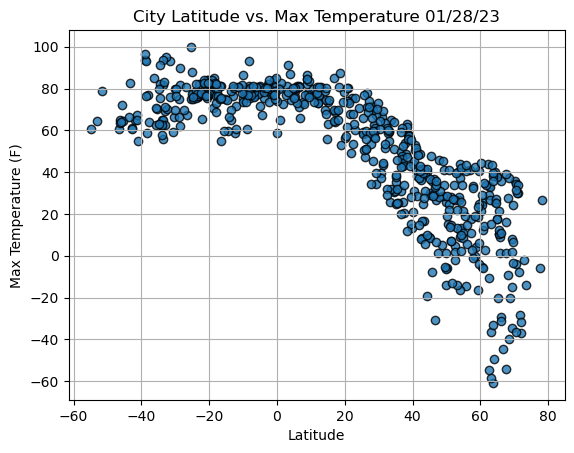

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#UPDATES THIS FOR FINAL CODE
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

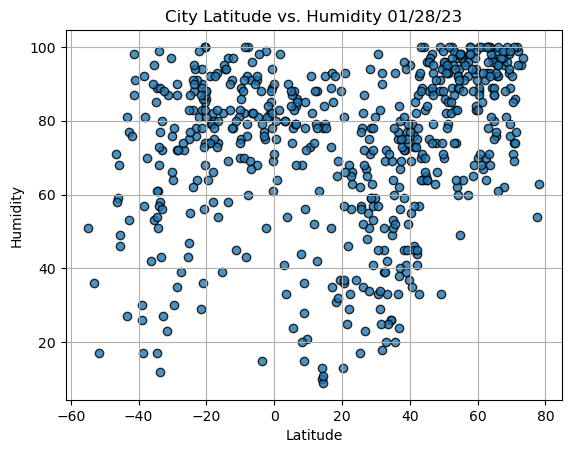

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

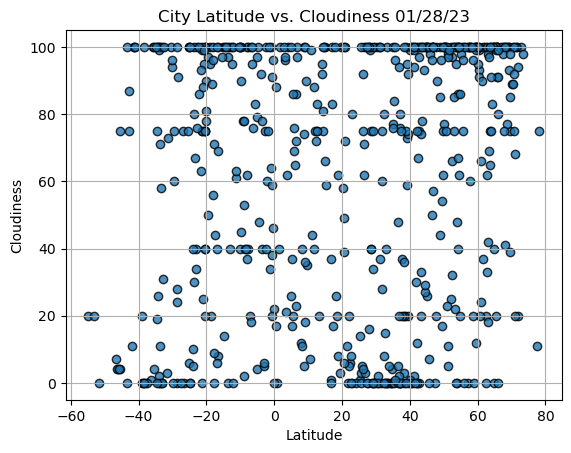

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

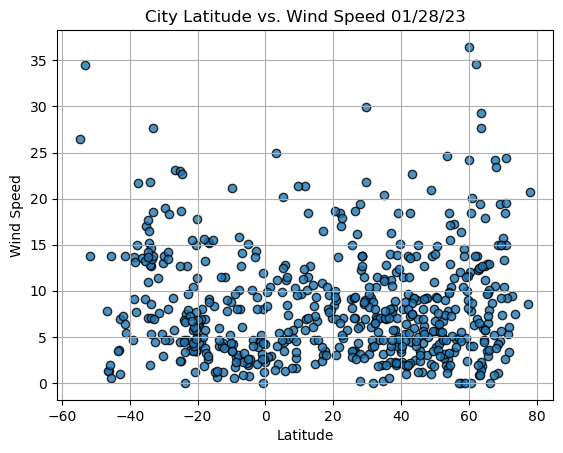

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
#

In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


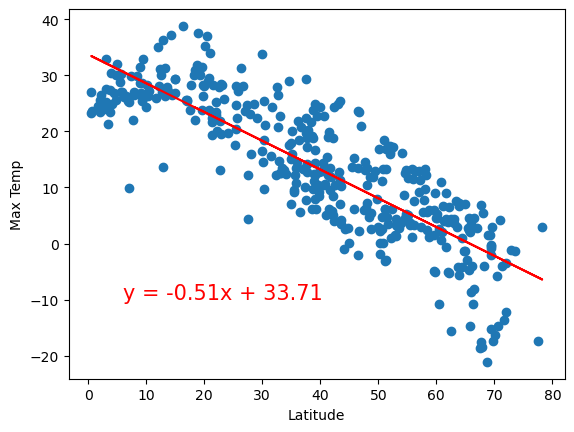

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


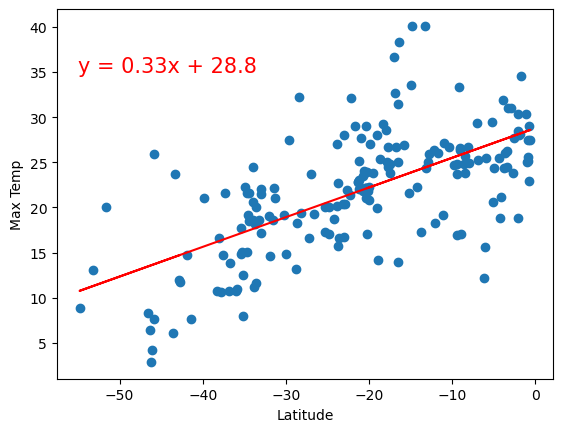

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


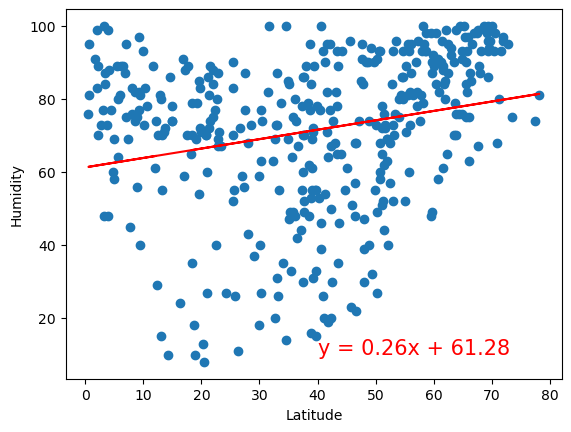

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


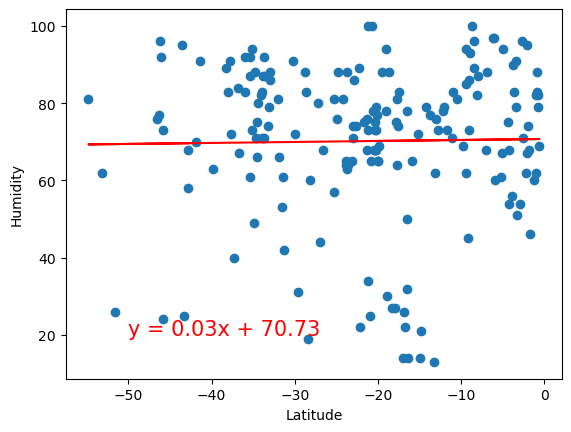

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


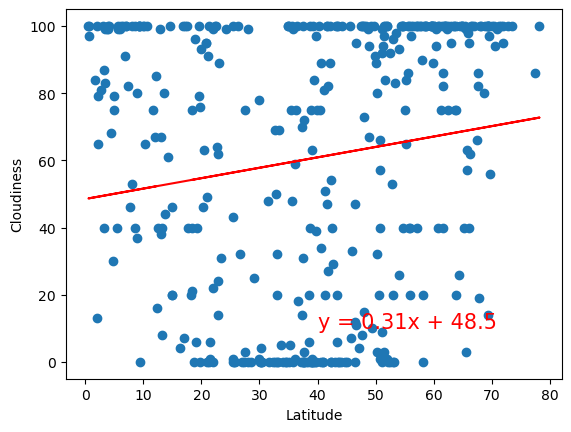

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


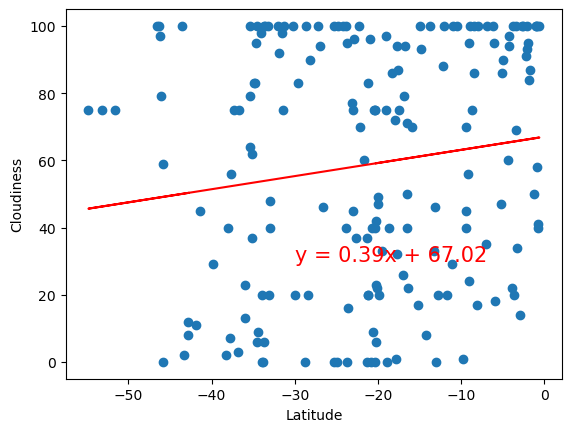

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


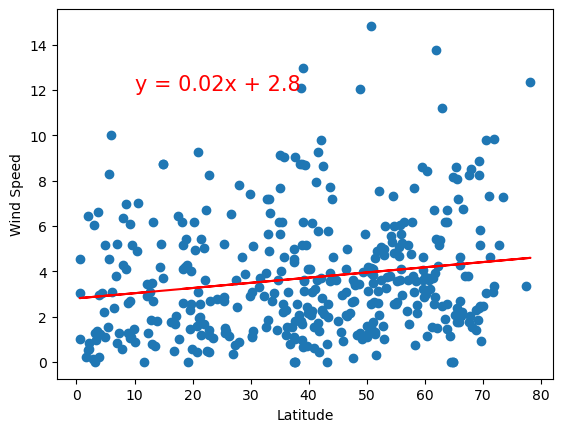

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


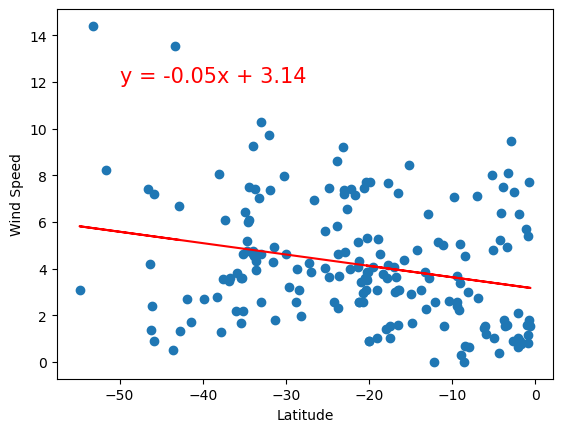

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE